In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Lecture du dataset

In [167]:
netflix_df = pd.read_csv("../data/netflix_titles.csv", delimiter=",",
                         names=["show_id", "type", "title", "director", "cast", "country", "date_added", "release_year",
                                "rating", "duration"
                             , "listed_in", "description"], header=1)

Nettoyage des données : supprimer les NaN

In [168]:
netflix_df["country"] = netflix_df["country"].fillna(netflix_df["country"].mode()[0])
netflix_date = netflix_df[["date_added"]].dropna()
netflix_df["cast"] = netflix_df["cast"].fillna(netflix_df["cast"].mode()[0])

Voici un aperçu du dataset que nous avons étudié :

In [169]:
display(netflix_df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s4,TV Show,Jailbirds New Orleans,NaN,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
3,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


Dans un premier temps nous allons nous intéresser à nos données globales : quelle est la répartition des films et séries dans le dataset ?

# Films et séries

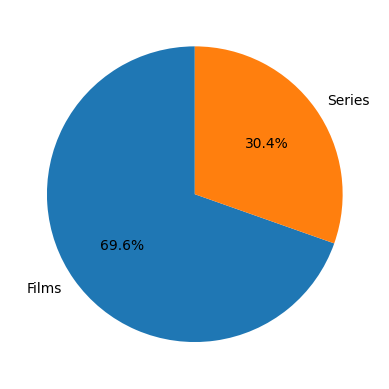

In [170]:
movie = "Movie"
tv_show = "TV Show"
netflix_movies = netflix_df[netflix_df.loc[::, "type"] == movie]
netflix_tv_shows = netflix_df[netflix_df.loc[::, "type"] == tv_show]
netflix_movies_percentage = (netflix_movies.loc[::, "type"].count() / len(netflix_df)).round(3) * 100
netflix_tv_shows_percentage = (netflix_tv_shows.loc[::, "type"].count() / len(netflix_df)).round(3) * 100
labels = "Films", "Series"
plt.pie([netflix_movies_percentage, netflix_tv_shows_percentage],
        labels=labels, autopct="%1.1f%%", startangle=90)
plt.show()

In [171]:
display(f"{netflix_movies.loc[::, 'type'].count()} films")
display(f"{netflix_tv_shows.loc[::, 'type'].count()} séries")

'6130 films'

'2676 séries'

Maintenant nous voulons comptabiliser le nombre de films et séries par pays et donc de voir quels sont les pays qui produisent le plus de films et séries. Dans notre dataset, nous avons des films et séries qui sont produits dans plusieurs pays. Notre objectif est donc de comptabiliser tous les pays dans lesquels ont été produit les films.

In [172]:
def countries_by_type(content_type):
    countries = []
    for mov in netflix_df[netflix_df.loc[::, "type"] == content_type]["country"]:
        if len(mov.split(",")) > 1:
            for m in mov.split(","):
                countries.append(m.strip())
        else:
            countries.append(mov)
    return countries

Il nous faut également un fonction qui nous permet de compter combien de fois les pays apparaissent dans nos données.

In [173]:
def count_occ(liste, sorted_list=True):
    occ = {}
    for element in liste:
        if element in occ:
            occ[element] += 1
        else:
            occ[element] = 1
    if not sorted_list :
        occ_keys = list(occ.keys())
        occ_keys.sort()
        return {i: occ[i] for i in sorted(occ_keys, reverse=True)}

    return {k: v for k, v in sorted(occ.items(), key=lambda item: item[1], reverse=True)}

Nous avons défini une fonction générique pour afficher les barplot

In [174]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] // 2, y[i], ha="center")

def display_bar(dic, title, x_axis_label, y_axis_label, n=10):
    val = list(dic.keys())[:n]
    occ = list(dic.values())[:n]
    colors = ['#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093', '#C71585', '#FFA07A', '#FF7F50', '#FF4500', '#FF8C00']
    plt.bar(val, occ, color=colors)
    add_labels(val, occ)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

def display_pie(elements, n=10):
    percentages = []
    keys = list(elements.keys())[:n]
    values = list(elements.values())[:n]
    for value in values :
        percentages.append((value / len(elements)) * 100)
    plt.pie(percentages, labels=keys, autopct="%1.1f%%", startangle=90)
    plt.show()

Les pays qui produisent le plus de films

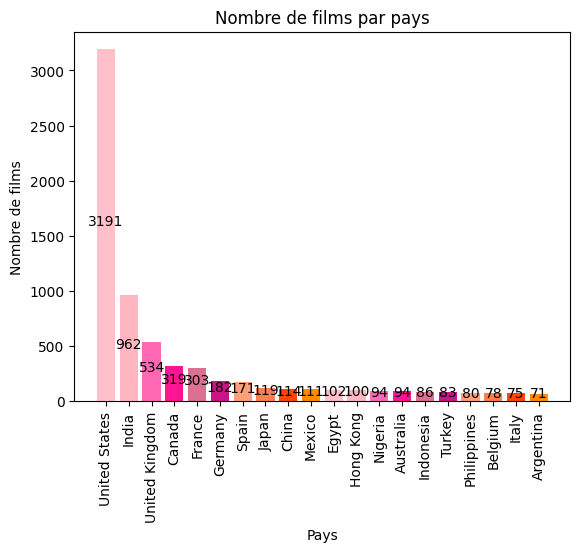

In [175]:
countries_by_movies = countries_by_type(movie)
countries_by_movies_occ = count_occ(countries_by_movies)
display_bar(countries_by_movies_occ, "Nombre de films par pays", "Pays", "Nombre de films", n=20)

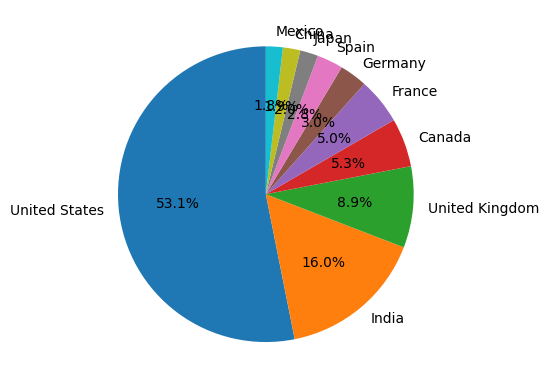

In [176]:
display_pie(countries_by_movies_occ)

Les pays qui produisent le plus de séries

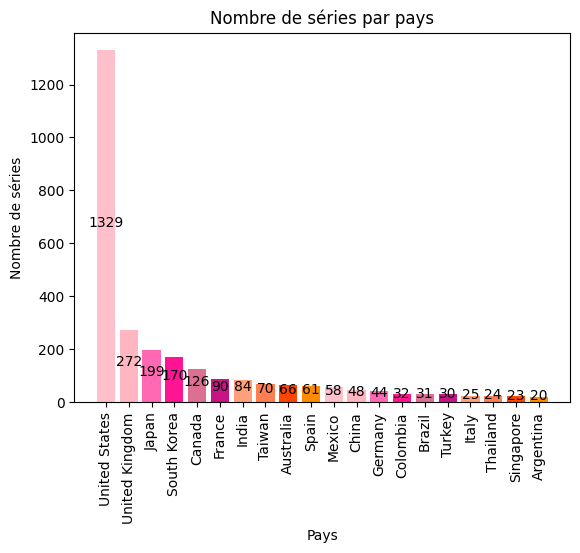

In [177]:
countries_by_tv_shows = countries_by_type(tv_show)
countries_by_tv_shows_occ = count_occ(countries_by_tv_shows)
display_bar(countries_by_tv_shows_occ, "Nombre de séries par pays", "Pays", "Nombre de séries", n=20)

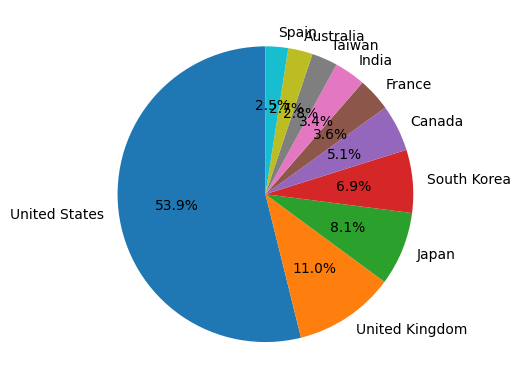

In [178]:
display_pie(countries_by_tv_shows_occ)

## Classifications
Maintenant nous allons nous intéresser aux classifications des films (ratings). Voici les classifications présentes dans notre dataset :

In [179]:
# Nettoyage des classifications erronées
netflix_df['rating'].replace(to_replace=[None, 'UR', '66 min', '74 min', '84 min'], value='NR', inplace=True)

display(netflix_df["rating"].unique().tolist()[1:])

['PG',
 'TV-14',
 'PG-13',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'R',
 'TV-G',
 'G',
 'NC-17',
 'NR',
 'TV-Y7-FV']

Ces classifications sont issues des modèles américains [MPA](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system) et [TVPG](https://en.wikipedia.org/wiki/TV_Parental_Guidelines). TVPG est aussi bien utilisé pour le cinéma (souvent après portage sur support DVD, Blueray, etc) que pour les séries, tandis que MPA n'est utilisé qu'au cinéma.

En observant toutes les classifications présentes dans nos données, nous pouvons créer 4 catégories :
- Adultes : NC-17, TV-MA et R.
- Adolescents : PG-13 et TV-14.
- Pré-adolescents : PG et TV-PG.
- Enfants : TV-Y7-FV, TV-Y7, TV-Y, TV-G et G.
NR (*non rated*) correspond aux films non évalués par le système de classifications.

Maintenant, nous allons compter le nombre de films dans chaque classification :

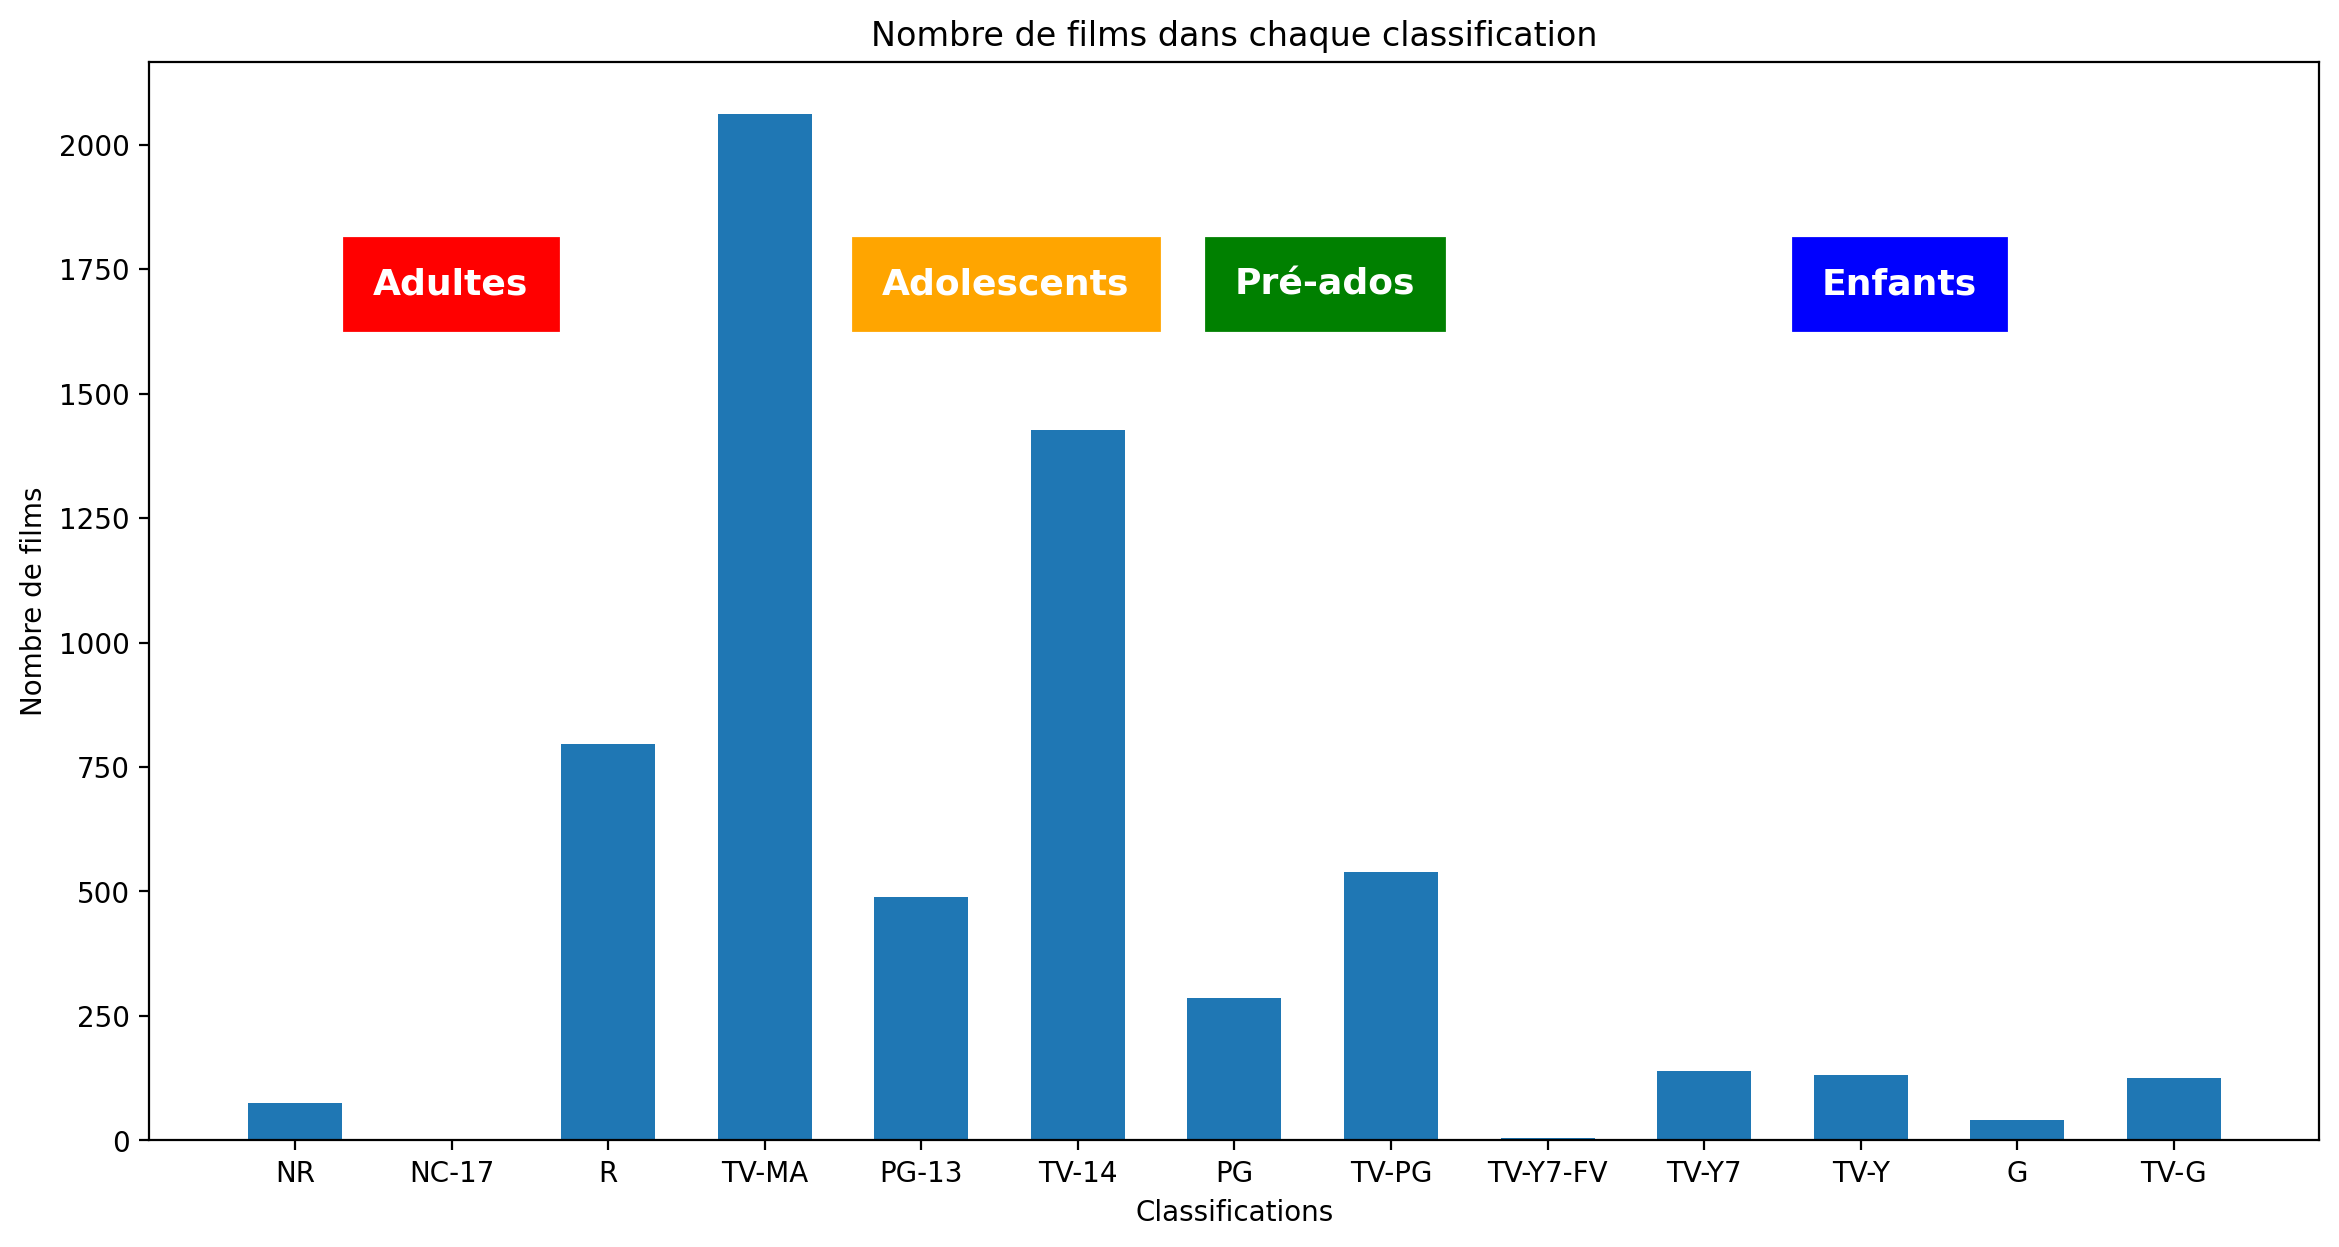

In [195]:
categories = ["Adultes", "Adolescents", "Pré-ados", "Enfants"]

ratings_m = ["NR", "NC-17", "R", "TV-MA", "PG-13", "TV-14", "PG", "TV-PG", "TV-Y7-FV", "TV-Y7", "TV-Y", "G", "TV-G"]

movie_rating = netflix_movies["rating"].value_counts()[ratings_m]

fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(movie_rating.index, movie_rating, width=0.6)
ax.set_title("Nombre de films dans chaque classification")
plt.xlabel("Classifications")
plt.ylabel("Nombre de films")
ax.annotate("Adultes", xy=(0.5, 1700), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="red"))
ax.annotate("Adolescents", xy=(3.75, 1700), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="orange"))
ax.annotate("Pré-ados", xy=(6, 1700), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="green"))
ax.annotate("Enfants", xy=(9.75, 1700), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="blue"))
plt.show()

et le nombre de séries dans chaque classification :

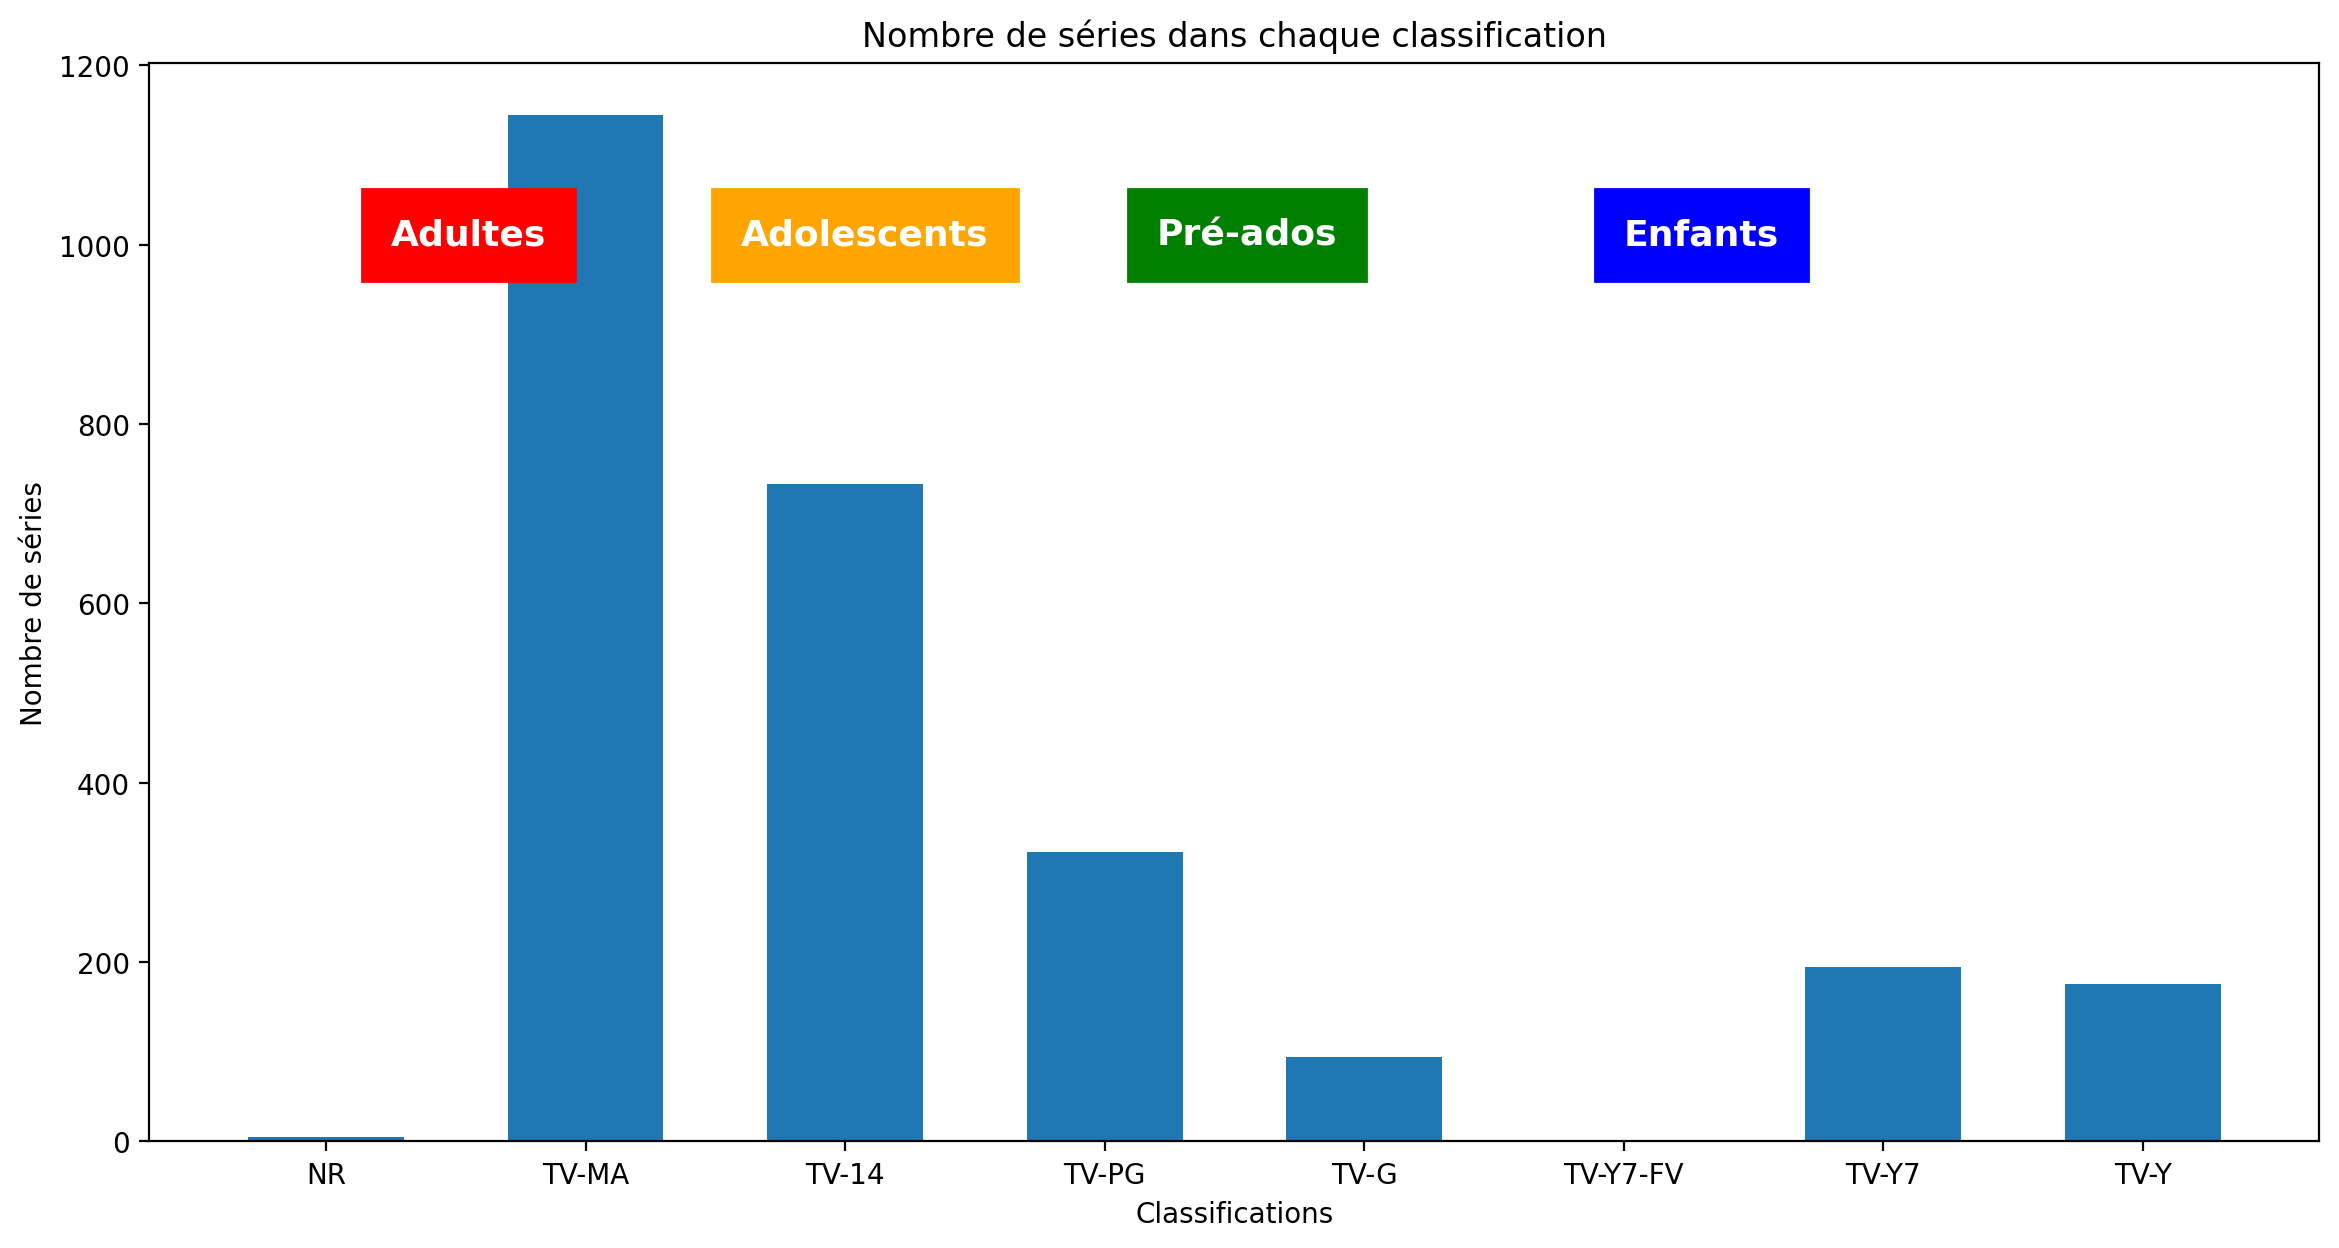

In [181]:
ratings_ts = ["NR", "TV-MA", "TV-14", "TV-PG", "TV-G", "TV-Y7-FV", "TV-Y7", "TV-Y"]
tv_show_rating = netflix_tv_shows["rating"].value_counts()[ratings_ts]

fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(tv_show_rating.index, tv_show_rating, width=0.6)
ax.set_title("Nombre de séries dans chaque classification")
plt.xlabel("Classifications")
plt.ylabel("Nombre de séries")
ax.annotate("Adultes", xy=(0.25, 1000), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="red"))
ax.annotate("Adolescents", xy=(1.6, 1000), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="orange"))
ax.annotate("Pré-ados", xy=(3.2, 1000), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="green"))
ax.annotate("Enfants", xy=(5, 1000), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="blue"))
plt.show()

## Genres

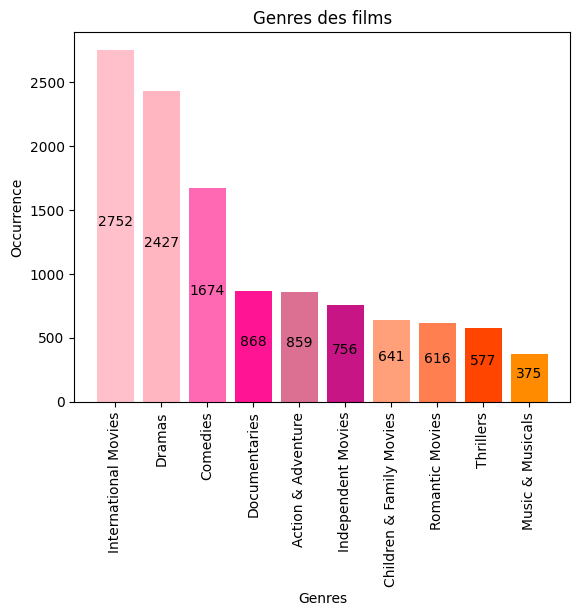

In [182]:
def get_all_genres(content_type):
    genres = []
    for genre in netflix_df[netflix_df.loc[::, "type"] == content_type]["listed_in"]:
        if len(genre.split(",")) > 1:
            for g in genre.split(","):
                genres.append(g.strip())
        else:
            genres.append(genre)
    return genres
movie_genres = get_all_genres(movie)
movie_genres_occ = count_occ(movie_genres)
display_bar(movie_genres_occ, "Genres des films", "Genres", "Occurrence")

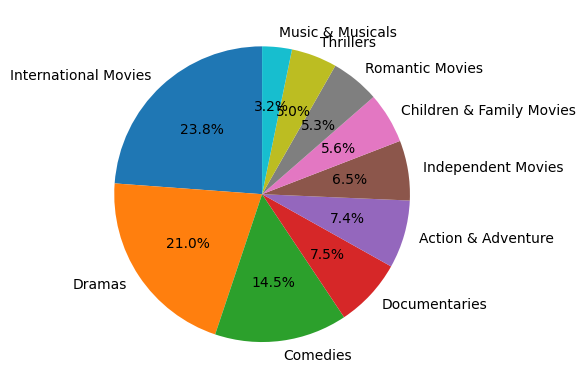

In [183]:
display_pie(movie_genres_occ)

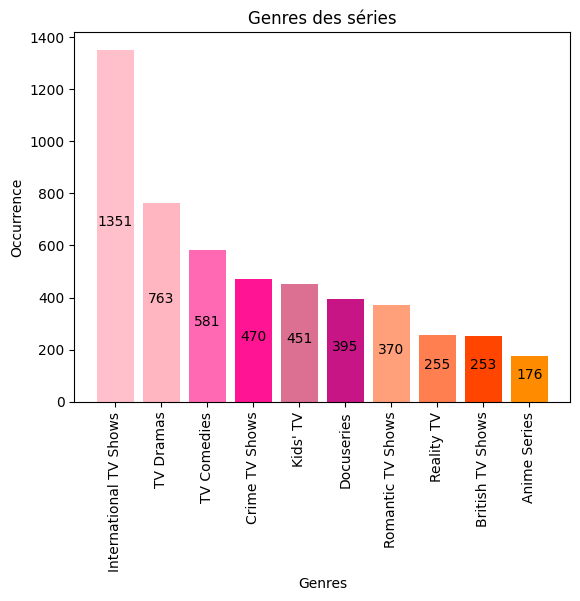

In [184]:
tv_show_genres = get_all_genres(tv_show)
tv_show_genres_occ = count_occ(tv_show_genres)
display_bar(tv_show_genres_occ, "Genres des séries", "Genres", "Occurrence")

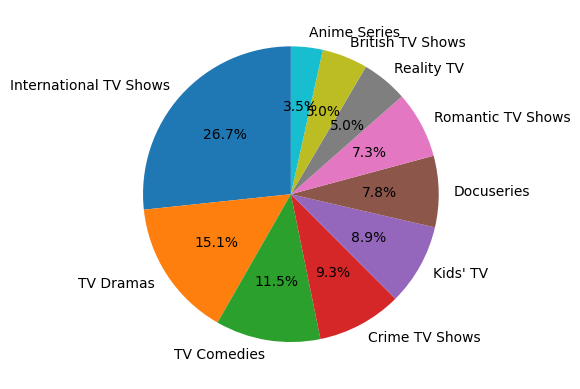

In [185]:
display_pie(tv_show_genres_occ)

## Années de sortie
Maintenant nous allons voir à quelles sont les années de sortie des films présents sur netflix :

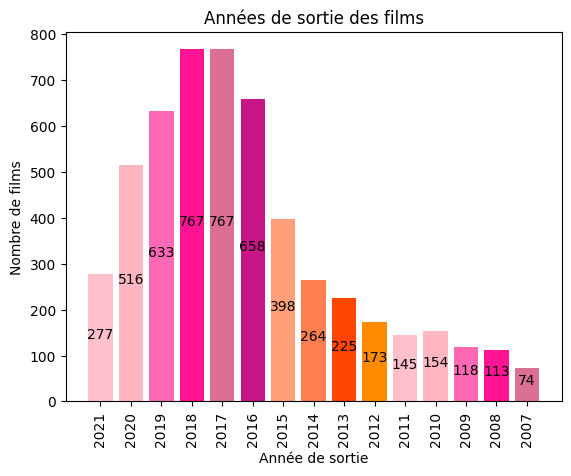

In [186]:
movies_release = netflix_df["release_year"].astype(str)[netflix_df.loc[::, "type"] == movie]
movies_release_occ = count_occ(movies_release, False)
display_bar(movies_release_occ, "Années de sortie des films", "Année de sortie", "Nombre de films", n=15)

et les années de sortie des séries :

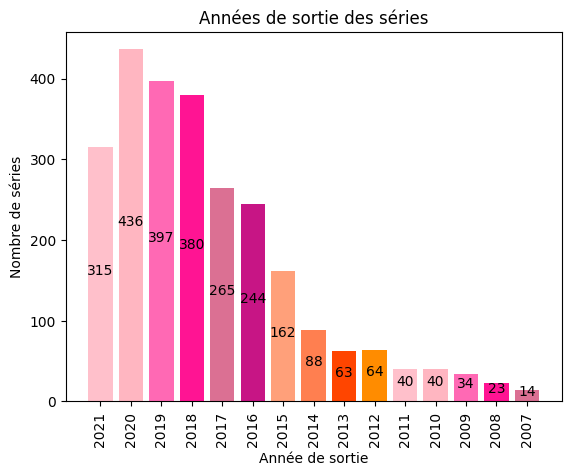

In [187]:
tv_shows_release = netflix_df["release_year"].astype(str)[netflix_df.loc[::, "type"] == tv_show]
tv_shows_release_occ = count_occ(tv_shows_release, sorted_list=False)
display_bar(tv_shows_release_occ, "Années de sortie des séries", "Année de sortie", "Nombre de séries", n=15)

## Périodes d'ajout de contenu

Maintenant nous allons voir dans quels sont les mois dans lesquels netflix ajoute le plus de contenu.

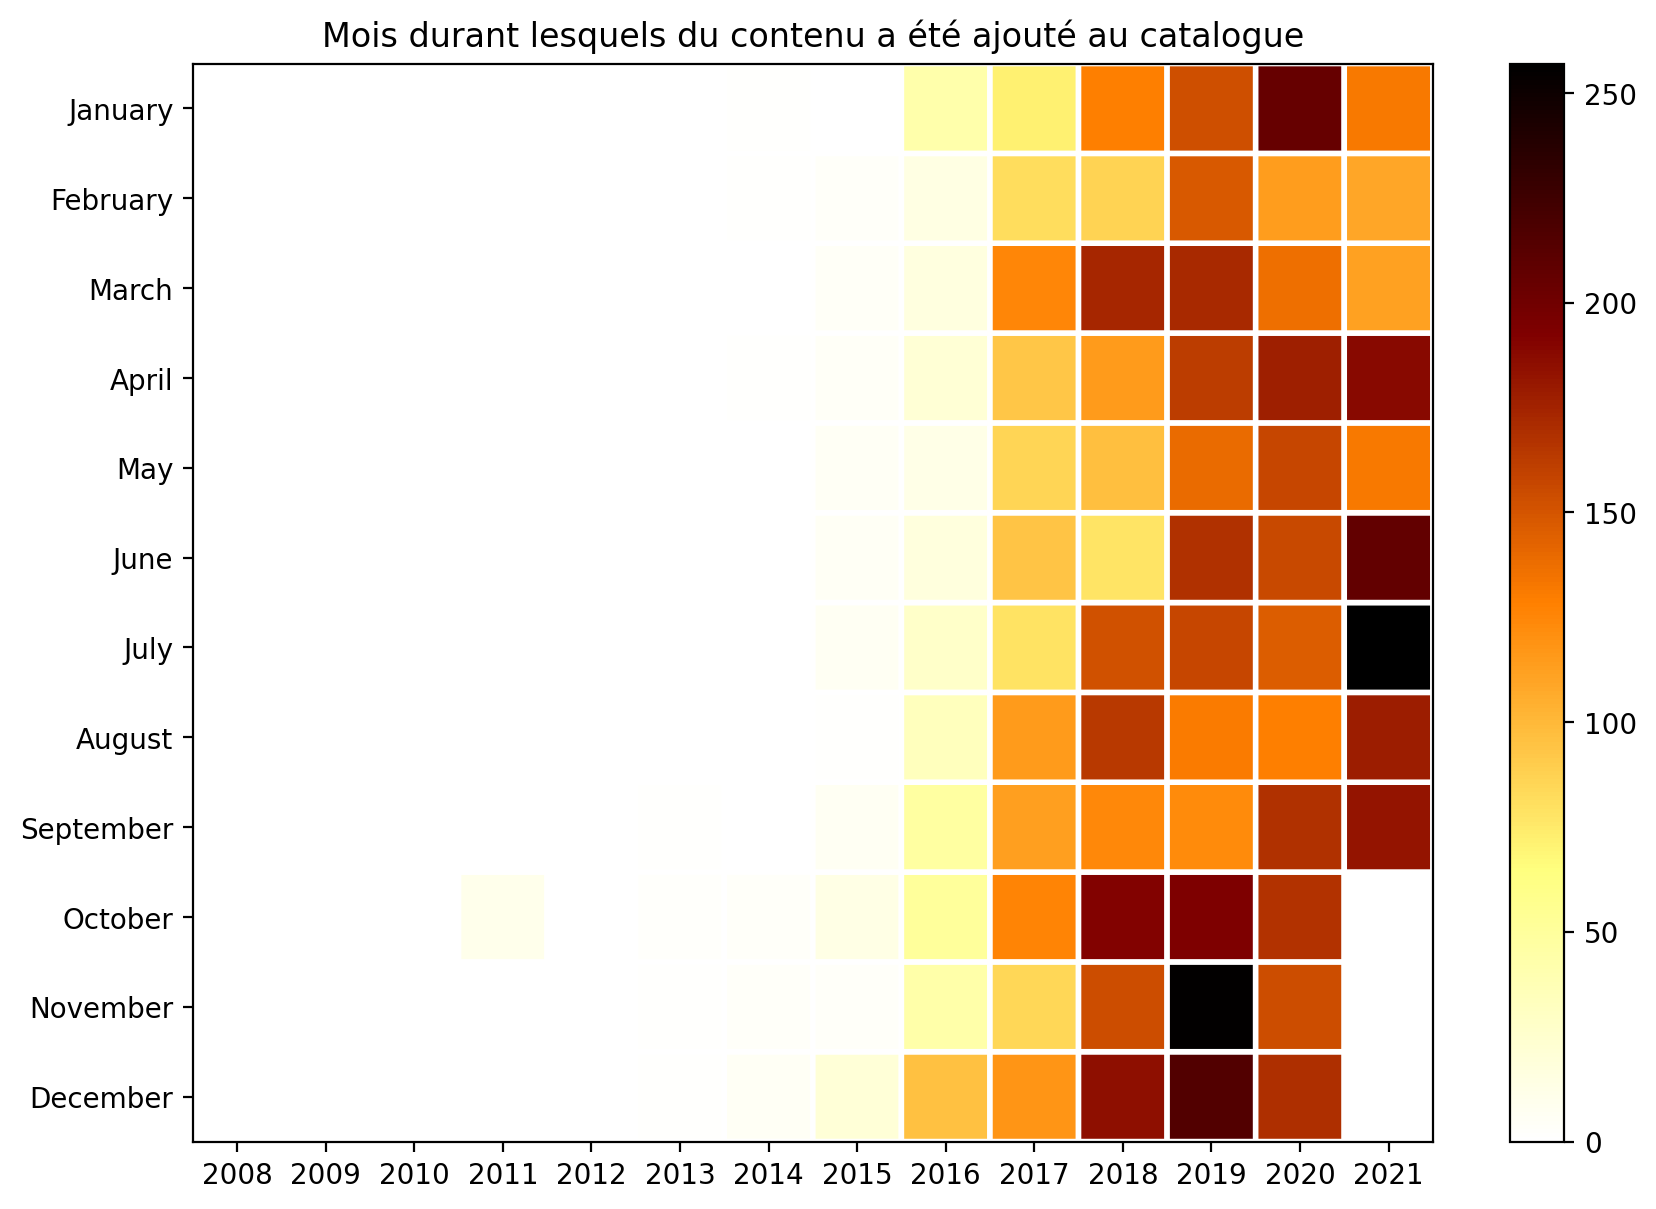

In [188]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"][::-1]

netflix_date["year"] =  netflix_df["date_added"].dropna().apply(lambda x: x.split(", ")[-1])
netflix_date["month"] =  netflix_df["date_added"].dropna().apply(lambda x: x.lstrip().split(" ")[0])

netflix_date_df = netflix_date.groupby("year")["month"].value_counts().unstack().fillna(0)[months].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(netflix_date_df, cmap="afmhot_r", edgecolors="w", linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(netflix_date_df.columns), 1), netflix_date_df.columns)
plt.yticks(np.arange(0.5, len(netflix_date_df.index), 1), netflix_date_df.index)

plt.title("Mois durant lesquels du contenu a été ajouté au catalogue")
plt.colorbar()

plt.show()

On peut regarder le différentiel entre année de sortie d'un film et l'année d'ajout sur netflix de façon globale :

In [189]:
netflix_date["year_added"] = netflix_df["date_added"].dropna().apply(lambda x: x.split(", ")[-1])
netflix_date["release_year"] = netflix_df["release_year"].dropna()

netflix_date["year_added", 0] = 0
netflix_date["release_year", 0] = 0

def mean_release_added_year():
    result = 0
    for index, row in netflix_date.iterrows():
        result += int(row["year_added"]) - int(row["release_year"])
    return result/len(netflix_date)

print(mean_release_added_year())


4.688835834470214


## Acteurs

On s'intéresse dans un premier temps aux acteurs les plus présents dans les films.

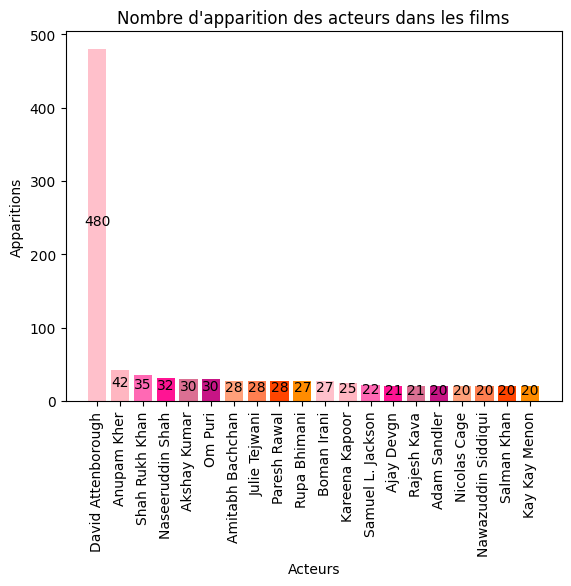

In [190]:
def get_actors(content_type):
    actors = []
    for actor in netflix_df["cast"][netflix_df.loc[::, "type"] == content_type]:
        if len(actor.split(",")) > 1:
            for a in actor.split(","):
                actors.append(a.strip())
        else:
            actors.append(actor)
    return actors

movie_actors = get_actors(movie)
movie_actors_occ = count_occ(movie_actors)
display_bar(movie_actors_occ, "Nombre d'apparition des acteurs dans les films", "Acteurs", "Apparitions", n=20)

et des séries :

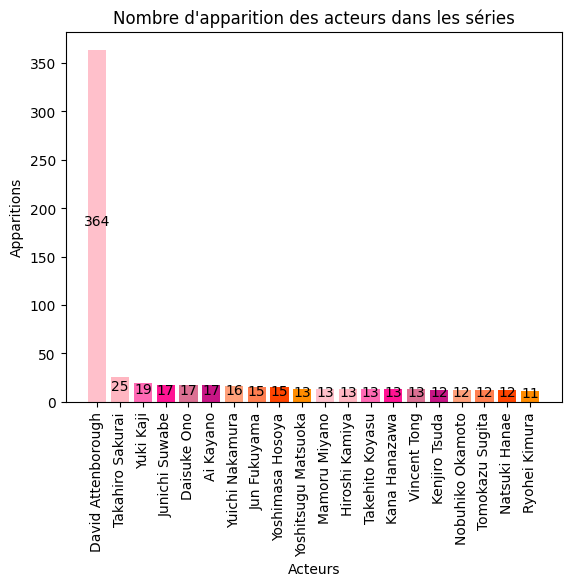

In [191]:
tv_show_actors = get_actors(tv_show)
tv_show_actors_occ = count_occ(tv_show_actors)
display_bar(tv_show_actors_occ, "Nombre d'apparition des acteurs dans les séries", "Acteurs", "Apparitions", n=20)

# Cas David Attenborough

Comme David Attenborough semble être une donnée aberrante, on peut commencer par regarder les genres pour lesquels il a été acteur. La colonne des genres ne contenant pas une donnée atomique, le décompte ne permet de savoir que le nombre de fois où Sir Attenborough a joué dans un film d'un certain genre ; on retrouvera donc pas le nombre total de films dans lesquels il a joué.

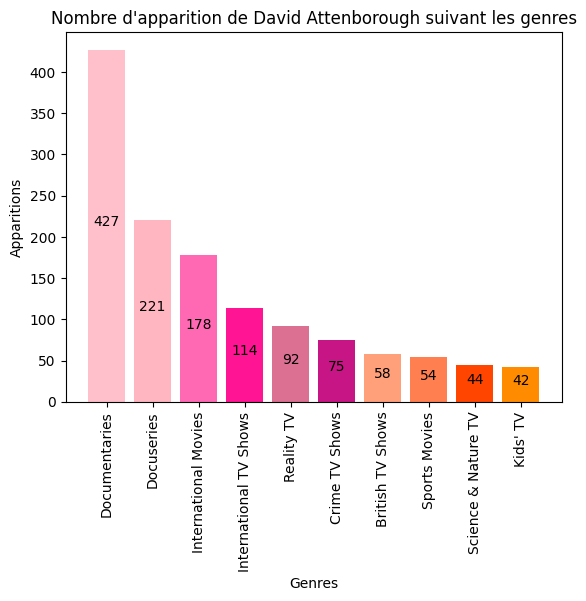

In [192]:
david_mask = netflix_df["cast"].str.contains('David Attenborough')

def get_david_genres():
    genres = []
    for genre in netflix_df[david_mask]["listed_in"]:
        if len(genre.split(",")) > 1:
            for g in genre.split(","):
                genres.append(g.strip())
        else:
            genres.append(genre)
    return genres

david_genres = get_david_genres()
david_genres_occ = count_occ(david_genres)
display_bar(david_genres_occ, "Nombre d'apparition de David Attenborough suivant les genres", "Genres", "Apparitions", n=15)

En recroisant avec les informations le concernant sur [Wikipédia](https://fr.wikipedia.org/wiki/David_Attenborough) et sur [son site](https://vegas-suites.com/attenboroughfilm/), on peut en déduire qu'il ne s'agit pas d'une erreur.